In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.fftpack import fft, ifft, fftfreq
from sklearn.preprocessing import normalize

%matplotlib inline

In [3]:
df=pd.read_csv('EDR_Day 2_data.csv')

In [4]:
df.head()

,datetime,ms,depth,hkload,spp1,p_rate1,spp2,p_rate2,bheight,rpm,...,shypeak(g),shyrms(g),shzcount(samples),shzsamprate(hz),shzmin(g),shzavg(g),shzmed(g),shzmax(g),shzpeak(g),shzrms(g)
0,2020-05-07 15:00,0,196,34.5675,0.918750,0.0,0.0,0.0,0.721875,0.0,...,2.243902,0.396157,3168.384423,1604.449033,-2.146341,-0.31821,-0.296669,1.121008,2.150328,0.415867
1,2020-05-07 15:00,0,196,34.4775,0.918750,0.0,0.0,0.0,0.721875,0.0,...,2.243902,0.396157,3168.384423,1604.449033,-2.146341,-0.31821,-0.296669,1.121008,2.150328,0.415867
2,2020-05-07 15:00,0,196,34.4325,0.907813,0.0,0.0,0.0,0.721875,0.0,...,2.243902,0.396157,3168.384423,1604.449033,-2.146341,-0.31821,-0.296669,1.121008,2.150328,0.415867
3,2020-05-07 15:00,0,196,34.4325,0.929688,0.0,0.0,0.0,0.721875,0.0,...,2.243902,0.396157,3168.384423,1604.449033,-2.146341,-0.31821,-0.296669,1.121008,2.150328,0.415867
4,2020-05-07 15:00,0,196,34.5600,0.940625,0.0,0.0,0.0,0.721875,0.0,...,2.243902,0.396157,3168.384423,1604.449033,-2.146341,-0.31821,-0.296669,1.121008,2.150328,0.415867


In [5]:
df['datetime']=pd.to_datetime(df['datetime'])

In [6]:
df.head()

,datetime,ms,depth,hkload,spp1,p_rate1,spp2,p_rate2,bheight,rpm,...,shypeak(g),shyrms(g),shzcount(samples),shzsamprate(hz),shzmin(g),shzavg(g),shzmed(g),shzmax(g),shzpeak(g),shzrms(g)
0,2020-05-07 15:00:00,0,196,34.5675,0.918750,0.0,0.0,0.0,0.721875,0.0,...,2.243902,0.396157,3168.384423,1604.449033,-2.146341,-0.31821,-0.296669,1.121008,2.150328,0.415867
1,2020-05-07 15:00:00,0,196,34.4775,0.918750,0.0,0.0,0.0,0.721875,0.0,...,2.243902,0.396157,3168.384423,1604.449033,-2.146341,-0.31821,-0.296669,1.121008,2.150328,0.415867
2,2020-05-07 15:00:00,0,196,34.4325,0.907813,0.0,0.0,0.0,0.721875,0.0,...,2.243902,0.396157,3168.384423,1604.449033,-2.146341,-0.31821,-0.296669,1.121008,2.150328,0.415867
3,2020-05-07 15:00:00,0,196,34.4325,0.929688,0.0,0.0,0.0,0.721875,0.0,...,2.243902,0.396157,3168.384423,1604.449033,-2.146341,-0.31821,-0.296669,1.121008,2.150328,0.415867
4,2020-05-07 15:00:00,0,196,34.5600,0.940625,0.0,0.0,0.0,0.721875,0.0,...,2.243902,0.396157,3168.384423,1604.449033,-2.146341,-0.31821,-0.296669,1.121008,2.150328,0.415867


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             14199 non-null  datetime64[ns]
 1   ms                   14199 non-null  int64         
 2   depth                14199 non-null  int64         
 3   hkload               14199 non-null  float64       
 4   spp1                 14199 non-null  float64       
 5   p_rate1              14199 non-null  float64       
 6   spp2                 14199 non-null  float64       
 7   p_rate2              14199 non-null  float64       
 8   bheight              14199 non-null  float64       
 9   rpm                  14193 non-null  float64       
 10  torque               14199 non-null  float64       
 11  wob                  10073 non-null  float64       
 12  bdepth               14199 non-null  int64         
 13  rop                  3110 non-n

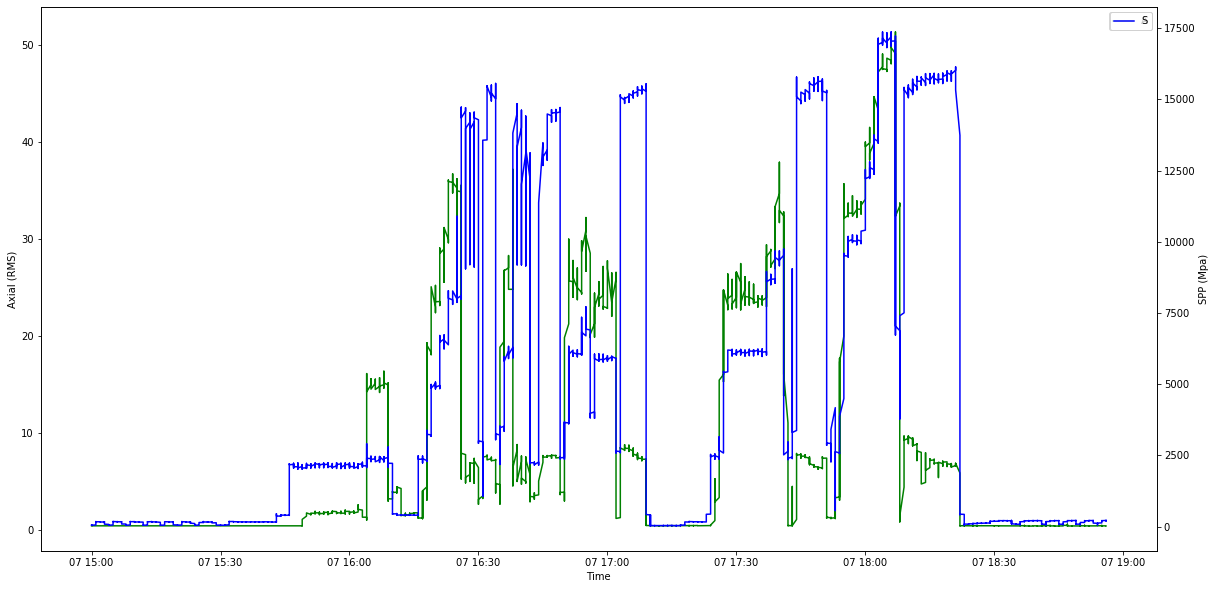

In [8]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
ax1.plot(df['datetime'], df['shxrms_g'], 'g')
ax2.plot(df['datetime'], df['spp'], 'b')
ax1.set_ylabel('Axial (RMS)')
ax1.set_xlabel('Time')
ax2.set_ylabel('SPP (Mpa)')
ax1.legend('Axial')
ax2.legend('SPP')

In [9]:
#taking a smaller sample for experiment

In [10]:
df_new=df[(df.datetime>'2020-05-07 17:22:00') & (df.datetime<'2020-05-07 17:43:00')]

Text(0, 0.5, 'SPP (Mpa)')

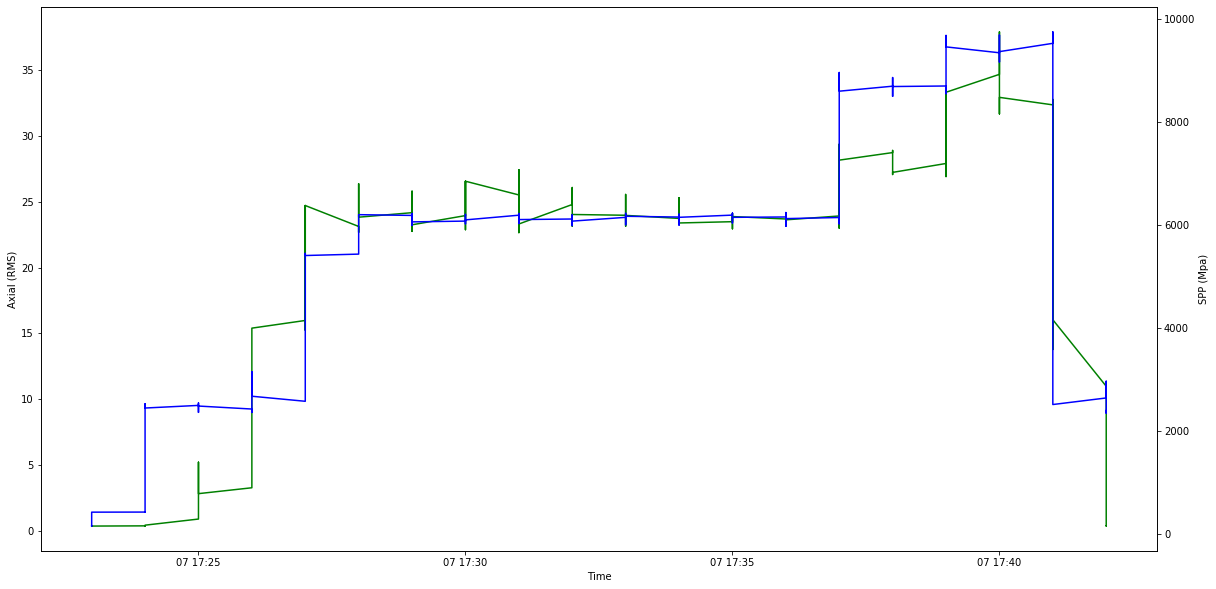

In [11]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
ax1.plot(df_new['datetime'], df_new['shxrms_g'], 'g')
ax2.plot(df_new['datetime'], df_new['spp'], 'b')
ax1.set_ylabel('Axial (RMS)')
ax1.set_xlabel('Time')
ax2.set_ylabel('SPP (Mpa)')

In [12]:
#Comput FFT
a=np.array(df['shxrms_g'])
X=fft(a)

In [13]:
#generate frequency axis
n=np.size(df['datetime'])
fr=(1/2) * np.linspace(0,n,int(n/2))
X_m=(2/n)*np.abs(X[0:np.size(fr)])

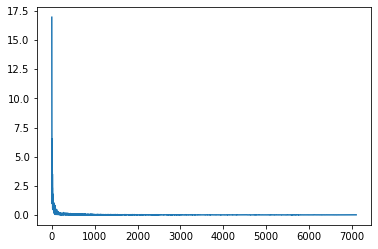

In [14]:
plt.plot(fr,X_m)

In [15]:
#power spectrum density

In [16]:
pp=(2/n)*(np.abs(X[0:np.size(fr)])**2)
pp.size

7099

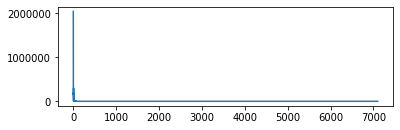

In [17]:
plt.subplot(2,1,2)
plt.plot(fr,pp)


In [18]:
nn=ifft(pp)

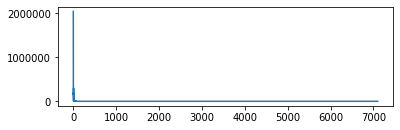

In [19]:
plt.subplot(2,1,2)
plt.plot(pp)

In [20]:
area=np.trapz(pp)
area

3071989.206667954

In [21]:
import numpy as np
print('Corr b/w Axial Acc and SSP:',np.corrcoef(df_new.shxrms_g,df_new.spp))


Corr b/w Axial Acc and SSP: [[1.         0.92928607]
 [0.92928607 1.        ]]


In [22]:
#Using Stats Model to understand the hypothesis: Model 1
import statsmodels.formula.api as smf
model1=smf.ols(formula='shxrms_g ~ spp', data=df_new).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               shxrms_g   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     7583.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:14:56   Log-Likelihood:                -3348.3
No. Observations:                1200   AIC:                             6701.
Df Residuals:                    1198   BIC:                             6711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4848      0.266     -5.583      0.000      -2.007      -0.963
spp            0.0039   4.45e-05     87.082      0.000       0.004       0.004
==============================================================================
Omnibus:                       18.069   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.126
Skew:                          -0.110   Prob(JB):                      0.00233
Kurtosis:                       2.559   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model1.pvalues

Intercept    2.919787e-08
spp          0.000000e+00
dtype: float64

In [24]:
#Scikit Learn Model
#Experimental Trial and Error using Looping
#Defining features and lables for the Regression problem

X=df_new.iloc[:,[14]]
y=df_new.iloc[:,[38]]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeClassifier

for i in range(1,30):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=i)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    training_score=model.score(X_train,y_train)
    testing_score=model.score(X_test,y_test)
   
    if testing_score > training_score:
        print("Testing : {} Training : {} Random State: {}".format(testing_score,training_score,i))

Testing : 0.8704813984972303 Training : 0.8616983439364501 Random State: 1
Testing : 0.8746100449139128 Training : 0.8607491187379476 Random State: 4
Testing : 0.870713694871997 Training : 0.8616116985897452 Random State: 6
Testing : 0.8702774411365489 Training : 0.86153969862909 Random State: 9
Testing : 0.889469403359566 Training : 0.8561747457667047 Random State: 10
Testing : 0.8762754516756212 Training : 0.8600503781887382 Random State: 11
Testing : 0.8658058945688287 Training : 0.8627550689409833 Random State: 17
Testing : 0.8635042933663221 Training : 0.8634863383946322 Random State: 20
Testing : 0.8769265369803092 Training : 0.8596847955179429 Random State: 24
Testing : 0.8655075518296644 Training : 0.8630054115085324 Random State: 26
Testing : 0.8686646941502558 Training : 0.8621263612247726 Random State: 28


In [27]:
from sklearn.linear_model import Lasso

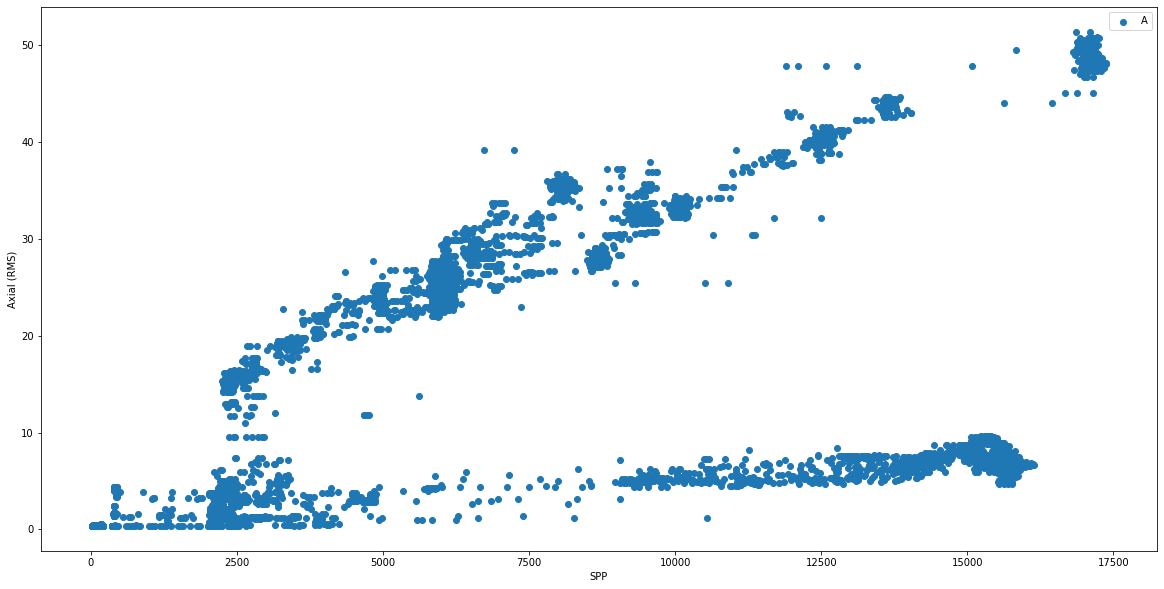

In [37]:
#Anomaly Detection
fig, ax1 = plt.subplots(figsize=(20,10))
#ax2 = ax1.twinx()
ax1.scatter(df['spp'], df['shxrms_g'])
#ax2.plot(df['datetime'], df['spp'], 'b', kind='scatter')
ax1.set_ylabel('Axial (RMS)')
ax1.set_xlabel('SPP')
#ax2.set_ylabel('SPP (Mpa)')
ax1.legend('Axial')
#ax2.legend('SPP')